# Make Classification Generator

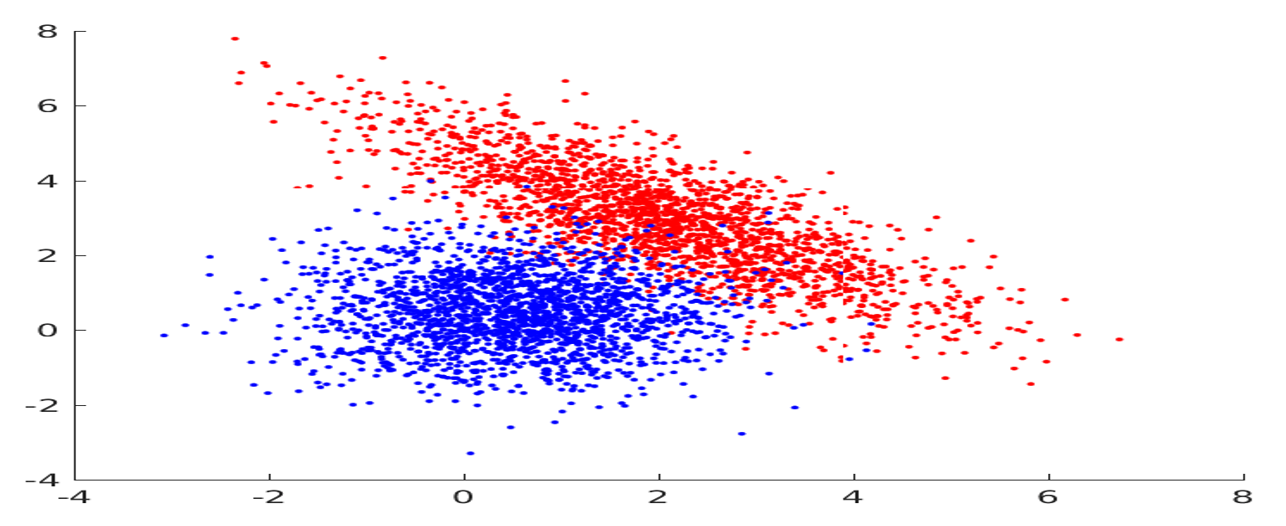

## About:

### **In this notebook, we will generate a dataset using the "SciKit-Learn Make Classification Generator," experiment with various machine learning models, and compare the results.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Create Classification Generator

In [2]:
from sklearn.datasets import make_classification

In [3]:
X_gen, y_gen = make_classification(n_samples=1000, n_features=10, n_informative=4, n_classes=4, random_state=99)

In [4]:
X_gen.shape

(1000, 10)

In [5]:
y_gen.shape

(1000,)

In [6]:
df = pd.DataFrame(data = X_gen)
df['y'] = y_gen

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,y
0,-1.133035,0.353416,1.329501,0.346527,1.972259,1.993595,-1.624466,1.757569,1.945213,-0.857302,0
1,0.228521,-0.086334,3.403418,0.984230,2.062233,1.123050,-1.873491,1.745565,2.989101,2.857453,1
2,1.485621,1.230326,0.604695,-0.376610,0.816084,-0.837897,-1.743305,-0.627905,1.939475,-0.646312,1
3,-0.601222,-1.614548,-0.369688,0.064646,-0.564011,0.131763,-1.221666,0.848934,-1.996079,-0.122211,0
4,0.124987,-2.523078,-1.010841,-0.985689,0.252475,1.797507,-1.664028,-0.386484,-2.883851,0.517253,3
...,...,...,...,...,...,...,...,...,...,...,...
995,-2.969727,-1.589038,-0.084530,1.583136,-1.866670,1.681006,1.240595,0.756669,-2.436817,1.004266,3
996,-1.275313,0.351852,1.521517,0.725913,1.446861,0.465541,-1.009567,-0.628137,1.846115,-0.269499,0
997,-4.159052,6.055074,1.134907,2.704394,-0.052082,-0.510074,-1.016966,-1.043431,6.121071,-0.897402,0
998,-2.544776,3.140948,0.348116,0.933131,1.071951,-1.139790,0.309047,0.020322,3.450745,-1.688767,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  y       1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [9]:
custom_statistics = {
    'count': df.count(),
    'mean': df.mean(),
    'std': df.std(),
    '25%': df.quantile(0.25),
    '50%': df.quantile(0.5),
    '75%': df.quantile(0.75),
    'min': df.min(),
    'max': df.max()}
pd.DataFrame(custom_statistics)

,count,mean,std,25%,50%,75%,min,max
0,1000,0.000026,1.556918,-1.134006,0.074683,1.082419,-4.714140,5.509041
1,1000,0.015218,1.569904,-1.166115,-0.104025,1.069976,-4.061720,6.055074
2,1000,0.466310,1.453461,-0.371101,0.610911,1.409271,-4.539066,3.682575
3,1000,0.138906,1.175523,-0.489056,0.249009,0.919976,-4.089391,3.216058
4,1000,0.304693,1.565779,-0.829295,0.281249,1.400498,-3.835105,5.422686
5,1000,0.012096,1.002985,-0.695044,0.023232,0.673910,-2.997935,3.288022
6,1000,-0.014280,1.006273,-0.674089,-0.043934,0.661648,-3.025635,3.064580
7,1000,-0.012792,1.018329,-0.717856,-0.003942,0.664725,-3.470099,3.165082
8,1000,0.442150,1.813196,-0.906243,0.772295,1.579599,-4.474476,6.121071
9,1000,0.038081,0.993459,-0.682579,0.041939,0.724557,-2.685582,3.001594


<Axes: >

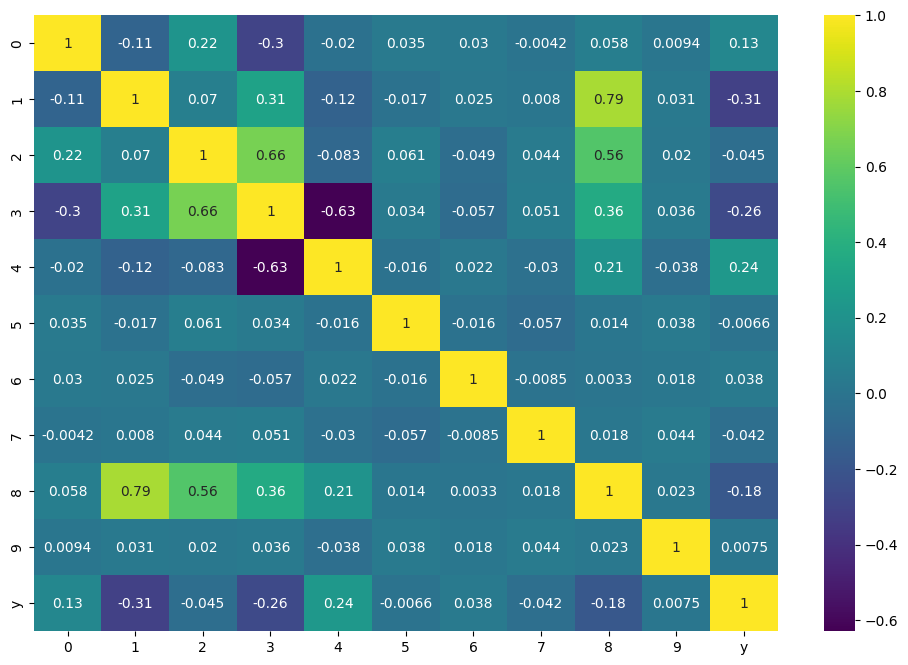

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

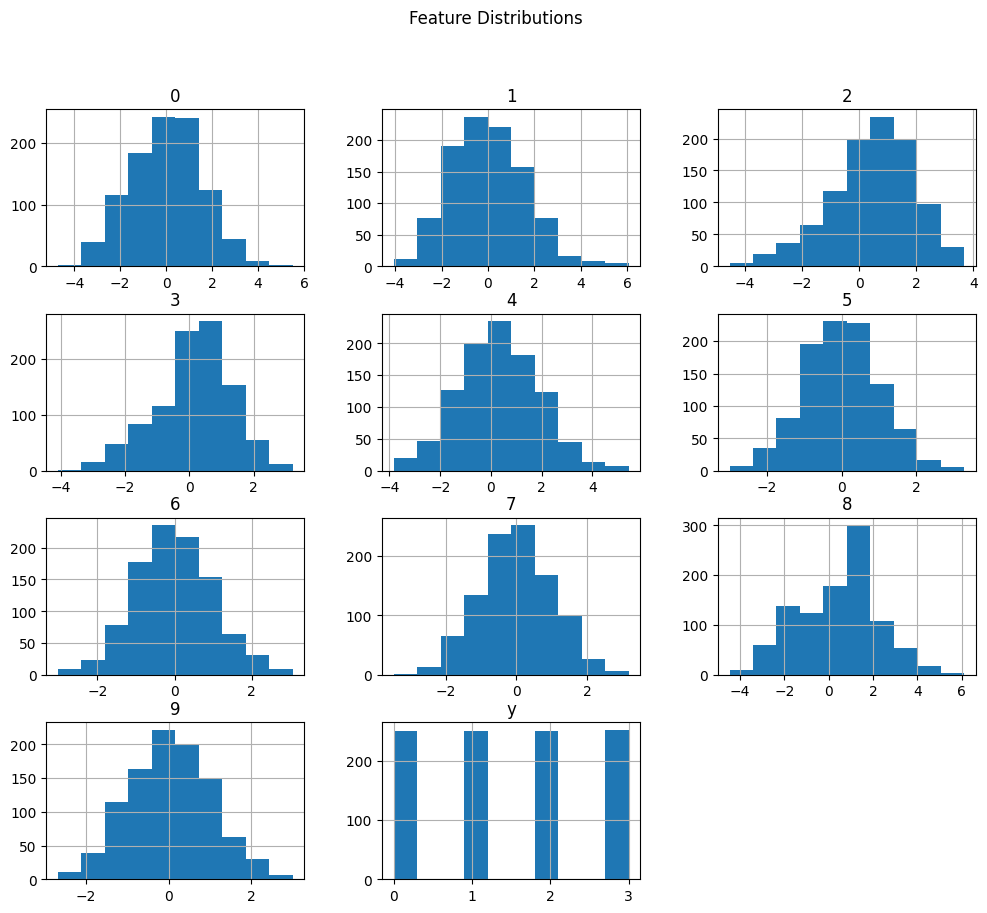

In [11]:
df.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions', x=0.5, y=0.98, ha='center',fontsize='large')
plt.show()

# Outliers

In [12]:
df.columns[:-1]

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object')

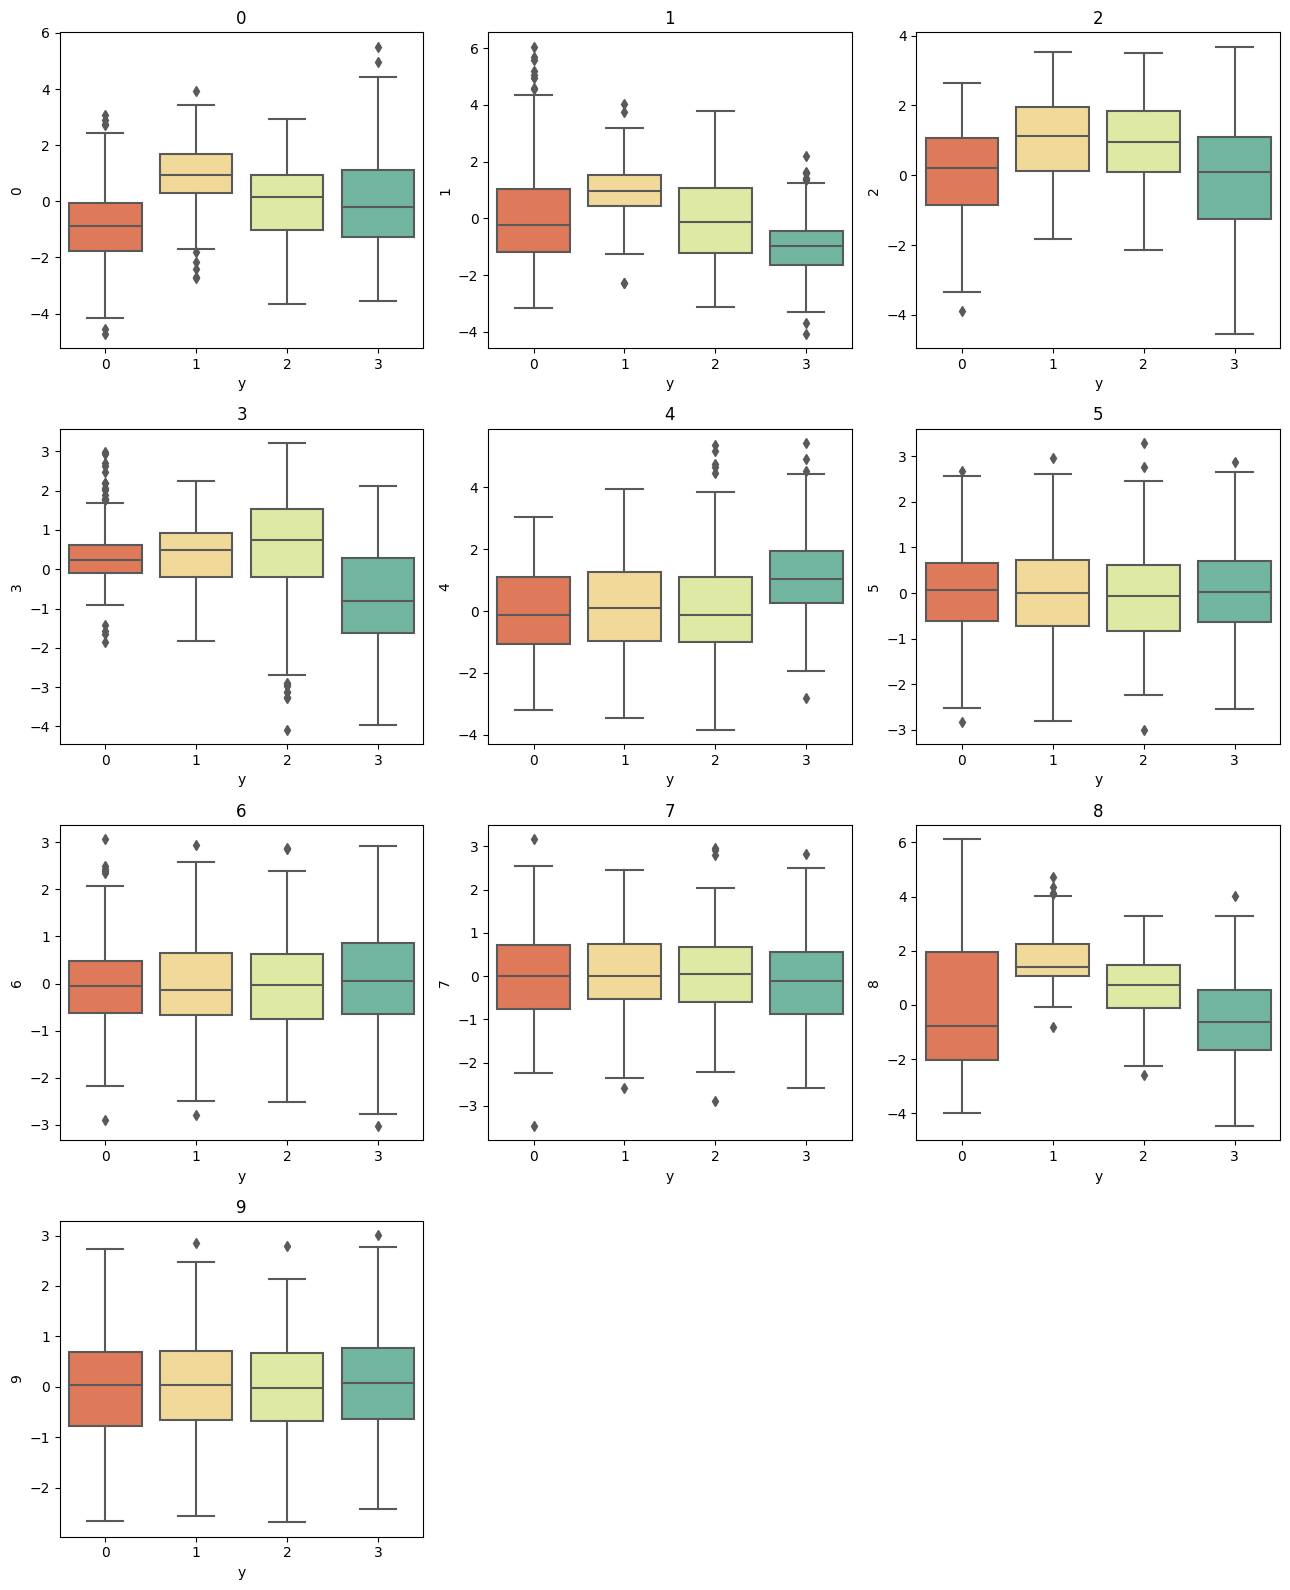

In [13]:
plt.figure(figsize = (13,16))
for index, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, index)
    sns.boxplot(x = 'y', y = column, data = df, palette = 'Spectral')
    plt.title(column)
plt.tight_layout()
plt.show()

## We will apply the Z-score method to eliminate outliers.

In [14]:
means = df.mean()
stds = df.std()

z_csores = (df - means)/stds

threshold = 3

outliers = (z_csores.abs() > threshold).any(axis = 1)

# Update df without the outliers
df =df[~outliers]

## Let's take another look at our updated dataset.

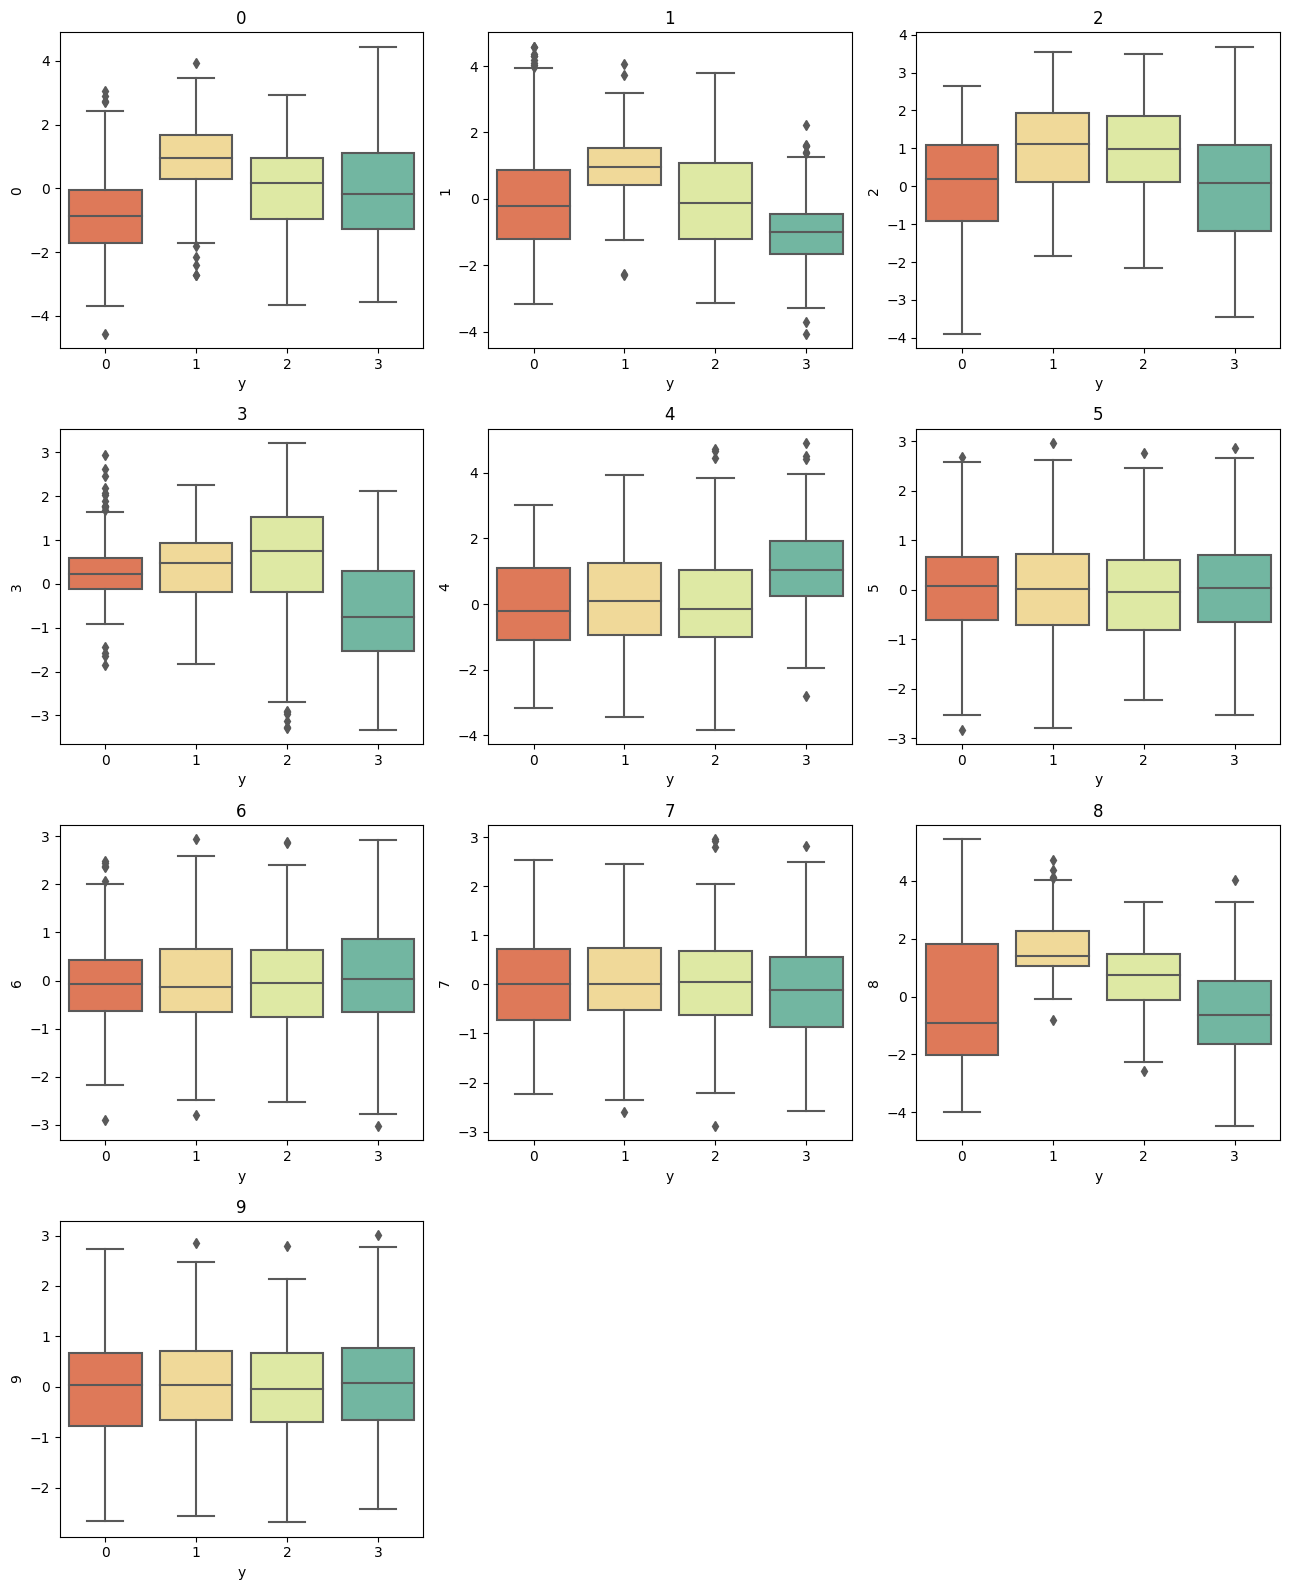

In [15]:
plt.figure(figsize = (13,16))
for index, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, index)
    sns.boxplot(x = 'y', y = column, data = df, palette = 'Spectral')
    plt.title(column)
plt.tight_layout()
plt.show()

### Here is a manual method for deleting outliers from a dataset (It was in the earlier version.)

In [16]:
# df.drop(df[(df[0]>=2.5)&(df['y']==0)].index, inplace = True)
# df.drop(df[(df[0]<=-1.8)&(df['y']==1)].index, inplace = True)
# df.drop(df[(df[1]>=4.2)&(df['y']==0)].index, inplace = True)
# df.drop(df[(df[1]>=1)&(df['y']==3)].index, inplace = True)
# df.drop(df[(df[3]<=-1)&(df['y']==0)].index, inplace = True)
# df.drop(df[(df[3]>=1.7)&(df['y']==0)].index, inplace = True)
# df.drop(df[(df[3]<=-2.5)&(df['y']==2)].index, inplace = True)
# df.drop(df[(df[4]>=4)&(df['y']==2)].index, inplace = True)
# df.drop(df[(df[6]>=2.1)&(df['y']==0)].index, inplace = True)
# df.drop(df[(df[7]>=2)&(df['y']==2)].index, inplace = True)

# Assign X and y

In [17]:
X = df.drop('y', axis = 1)
y = df['y']

# Create train and test subsets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

# Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Import Mertics

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model_lr = LogisticRegression(random_state=99)    

In [25]:
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=99)

In [26]:
y_pred_lr = model_lr.predict(X_test)

In [27]:
class_rep = classification_report(y_test,y_pred_lr)
print(class_rep)

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        60
           1       0.68      0.76      0.72        63
           2       0.41      0.43      0.42        54
           3       0.64      0.66      0.65        68

    accuracy                           0.59       245
   macro avg       0.58      0.58      0.58       245
weighted avg       0.59      0.59      0.58       245



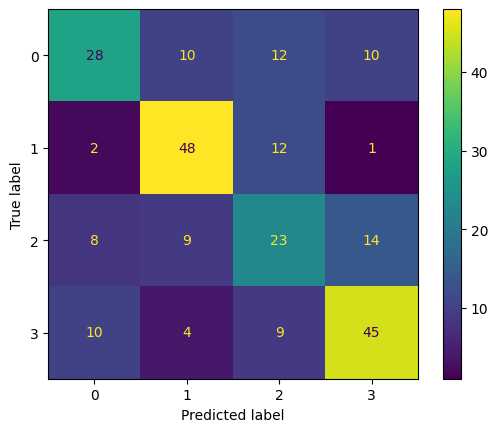

In [28]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_disp_lr = ConfusionMatrixDisplay(cm_lr).plot()

# Neural Nenwork

In [29]:
from keras.utils import to_categorical

2024-05-07 15:44:14.419223: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 15:44:14.419322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 15:44:14.584073: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:
y_train_nn = to_categorical(y_train, 4)
y_test_nn = to_categorical(y_test, 4)

In [31]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model_nn = Sequential()

model_nn.add(Dense(10, activation='relu'))
model_nn.add(Dense(20, activation='relu'))
model_nn.add(Dense(40, activation='relu'))
model_nn.add(Dense(40, activation='relu'))
model_nn.add(Dense(20, activation='relu'))
model_nn.add(Dense(4, activation='softmax'))

model_nn.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience = 10)

In [34]:
model_nn.fit(x = X_train, y = y_train_nn, epochs=200, validation_data=(X_test, y_test_nn), callbacks=[early_stop], verbose = 0)

I0000 00:00:1715096670.868705      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715096670.885237      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715096672.844769      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [35]:
losses = pd.DataFrame(model_nn.history.history)
losses

,accuracy,loss,val_accuracy,val_loss
0,0.246258,1.391005,0.293878,1.383088
1,0.317007,1.380030,0.342857,1.376735
2,0.348299,1.370248,0.404082,1.363541
3,0.353741,1.349732,0.420408,1.339905
4,0.408163,1.321584,0.436735,1.311593
...,...,...,...,...
83,0.816327,0.514514,0.714286,0.754283
84,0.805442,0.516211,0.742857,0.744533
85,0.819048,0.514658,0.730612,0.751817
86,0.802721,0.511395,0.734694,0.745433


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

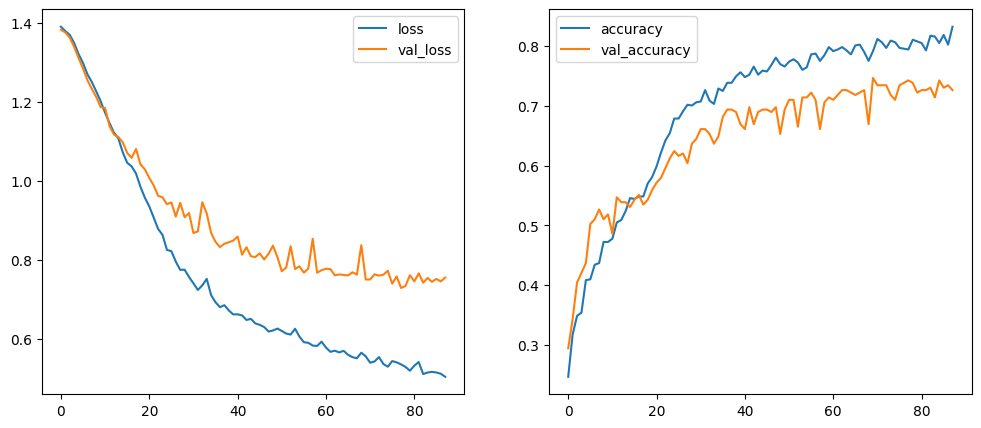

In [36]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
losses[['loss', 'val_loss']].plot(ax = axs[0])
losses[['accuracy', 'val_accuracy']].plot(ax = axs[1])
plt.tight_layout

In [37]:
y_pred_nn = np.argmax(model_nn.predict(X_test), axis=-1)
y_pred_nn

1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step

W0000 00:00:1715096682.236688      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


array([3, 2, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 3, 0, 3, 1, 1,
       2, 0, 3, 3, 0, 3, 0, 1, 0, 3, 3, 2, 2, 1, 3, 3, 0, 3, 3, 0, 0, 2,
       0, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 3, 3, 3, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 1, 3, 0, 2, 3, 3, 2, 3, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3,
       0, 2, 0, 2, 2, 0, 0, 2, 1, 3, 1, 2, 0, 1, 3, 0, 3, 2, 0, 0, 3, 1,
       1, 1, 3, 2, 0, 1, 2, 2, 1, 3, 1, 3, 0, 3, 2, 2, 1, 1, 1, 3, 0, 0,
       1, 1, 1, 3, 2, 1, 3, 3, 2, 3, 3, 1, 1, 2, 3, 0, 3, 2, 3, 3, 1, 3,
       1, 1, 3, 0, 2, 1, 0, 1, 3, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0,
       0, 1, 3, 3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 0, 3, 1, 1, 3, 2, 3, 2, 1,
       3, 3, 0, 0, 3, 1, 2, 0, 0, 3, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 2, 3,
       2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 1, 2, 0, 1, 3, 0, 2, 1, 1, 2,
       2, 0, 3])

In [38]:
class_rep_nn = classification_report(y_test,y_pred_nn)
print(class_rep_nn)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        60
           1       0.76      0.89      0.82        63
           2       0.61      0.65      0.63        54
           3       0.76      0.71      0.73        68

    accuracy                           0.73       245
   macro avg       0.72      0.72      0.72       245
weighted avg       0.73      0.73      0.72       245



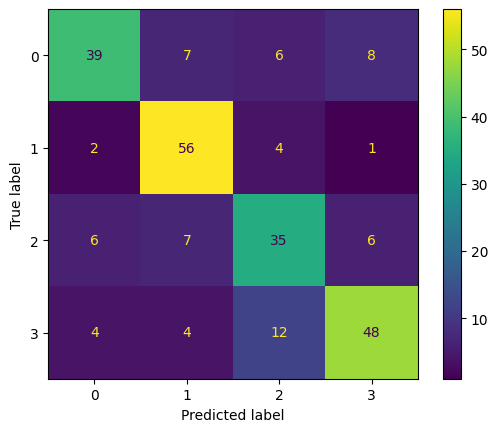

In [39]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_disp_nn = ConfusionMatrixDisplay(cm_nn).plot()

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [42]:
class_rep_knn = classification_report(y_test,y_pred_nn)
print(class_rep_nn)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        60
           1       0.76      0.89      0.82        63
           2       0.61      0.65      0.63        54
           3       0.76      0.71      0.73        68

    accuracy                           0.73       245
   macro avg       0.72      0.72      0.72       245
weighted avg       0.73      0.73      0.72       245



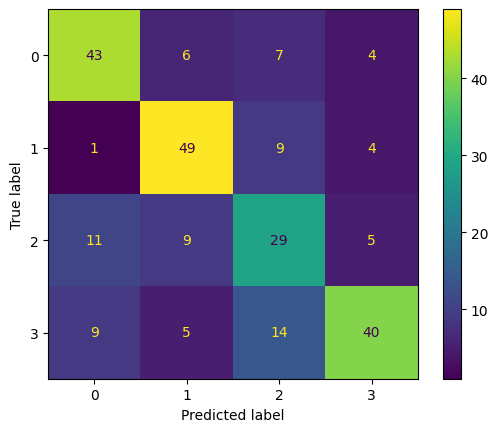

In [43]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_disp_knn = ConfusionMatrixDisplay(cm_knn).plot()

# Random Forest <a id="rf"></a>

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_rf = RandomForestClassifier(random_state=99)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [46]:
class_rep_rf = classification_report(y_test,y_pred_rf)
print(class_rep_rf)

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        60
           1       0.79      0.87      0.83        63
           2       0.64      0.67      0.65        54
           3       0.76      0.76      0.76        68

    accuracy                           0.76       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.76      0.76      0.75       245



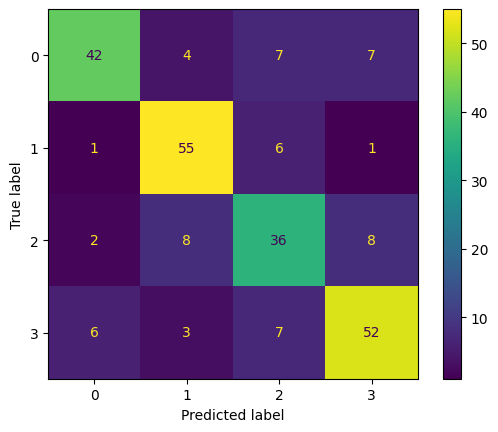

In [47]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_disp_rf = ConfusionMatrixDisplay(cm_rf).plot()

# Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model_nb = GaussianNB()

In [50]:
model_nb.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred_nb = model_nb.predict(X_test)

In [52]:
class_rep_nb = classification_report(y_test,y_pred_nb)
print(class_rep_nb)

              precision    recall  f1-score   support

           0       0.66      0.55      0.60        60
           1       0.65      0.87      0.74        63
           2       0.36      0.35      0.36        54
           3       0.68      0.57      0.62        68

    accuracy                           0.60       245
   macro avg       0.59      0.59      0.58       245
weighted avg       0.60      0.60      0.59       245



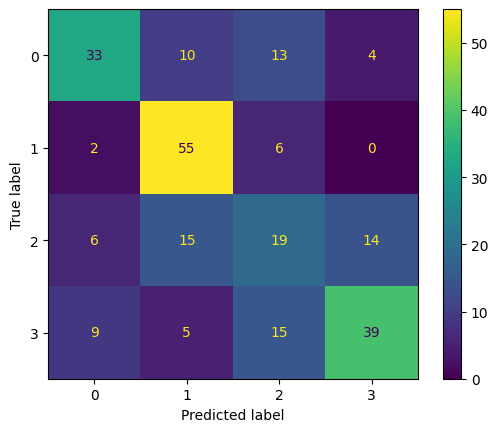

In [53]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_disp_nb = ConfusionMatrixDisplay(cm_nb).plot()

# Multi Layer Perceptron

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
model_mlp = MLPClassifier(random_state=99, max_iter=500, early_stopping=True)

In [56]:
model_mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, max_iter=500, random_state=99)

In [57]:
y_pred_mlp = model_mlp.predict(X_test)

In [58]:
class_rep_mlp = classification_report(y_test,y_pred_mlp)
print(class_rep_nb)

              precision    recall  f1-score   support

           0       0.66      0.55      0.60        60
           1       0.65      0.87      0.74        63
           2       0.36      0.35      0.36        54
           3       0.68      0.57      0.62        68

    accuracy                           0.60       245
   macro avg       0.59      0.59      0.58       245
weighted avg       0.60      0.60      0.59       245



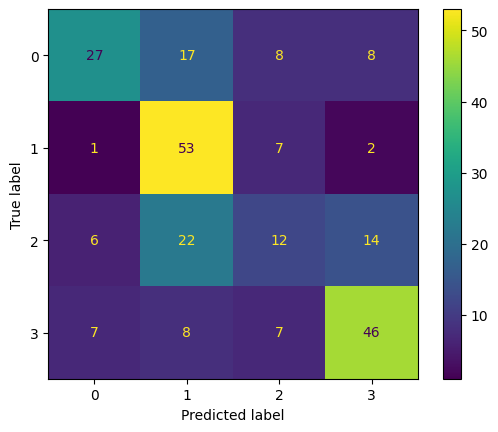

In [59]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_disp_mlp = ConfusionMatrixDisplay(cm_mlp).plot()

# XGBOOST

In [60]:
from xgboost import XGBClassifier

In [61]:
model_xgb = XGBClassifier(random_state=99)

In [62]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
y_pred_xgb = model_xgb.predict(X_test)

In [64]:
class_rep_xgb = classification_report(y_test,y_pred_xgb)
print(class_rep_xgb)

              precision    recall  f1-score   support

           0       0.77      0.68      0.73        60
           1       0.78      0.81      0.80        63
           2       0.67      0.70      0.68        54
           3       0.79      0.81      0.80        68

    accuracy                           0.76       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.76      0.76      0.75       245



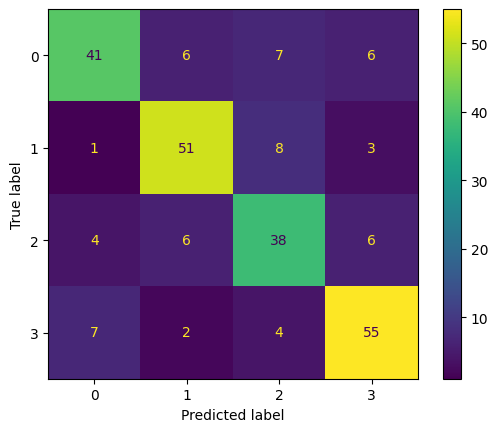

In [65]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_disp_xgb = ConfusionMatrixDisplay(cm_xgb).plot()

# Support Vector Machine

In [66]:
from sklearn.svm import SVC

In [67]:
model_svm = SVC(random_state=99)

In [68]:
model_svm.fit(X_train, y_train)

SVC(random_state=99)

In [69]:
y_pred_svm = model_svm.predict(X_test)

In [70]:
class_rep_svm = classification_report(y_test,y_pred_svm)
print(class_rep_svm)

              precision    recall  f1-score   support

           0       0.89      0.65      0.75        60
           1       0.76      0.83      0.79        63
           2       0.61      0.61      0.61        54
           3       0.71      0.82      0.76        68

    accuracy                           0.73       245
   macro avg       0.74      0.73      0.73       245
weighted avg       0.75      0.73      0.73       245



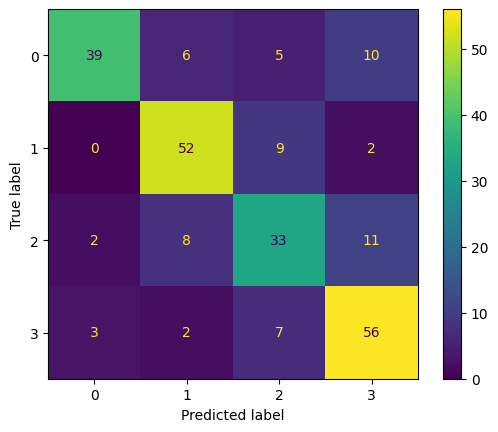

In [71]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_disp_svm = ConfusionMatrixDisplay(cm_svm).plot()

# Ada Boost Classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
model_abc = AdaBoostClassifier(random_state=99)

In [74]:
model_abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=99)

In [75]:
y_pred_abc = model_abc.predict(X_test)

In [76]:
class_rep_abc = classification_report(y_test,y_pred_abc)
print(class_rep_abc)

              precision    recall  f1-score   support

           0       0.49      0.40      0.44        60
           1       0.57      0.60      0.58        63
           2       0.25      0.30      0.27        54
           3       0.54      0.51      0.53        68

    accuracy                           0.46       245
   macro avg       0.46      0.45      0.46       245
weighted avg       0.47      0.46      0.46       245



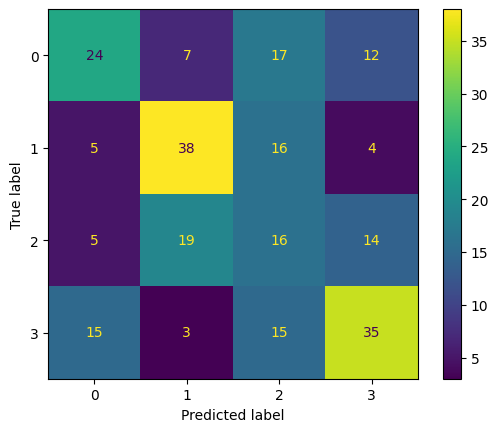

In [77]:
cm_abc = confusion_matrix(y_test, y_pred_abc)
cm_disp_abc = ConfusionMatrixDisplay(cm_abc).plot()

Random forest shows the best result. Let's try to optimise it 

# Random Forest with Hyperparameters Optimization

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
model_rf_opt = RandomForestClassifier(random_state=99)

In [80]:
parameters = {'n_estimators': [50, 100, 200, 400],
              'criterion': ["gini", "entropy", "log_loss"],
              'max_features': ["sqrt", "log2"],
              'bootstrap': [True, False]}

In [81]:
random_forest_grid = GridSearchCV(model_rf_opt, param_grid = parameters)

In [82]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=99),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 400]})

In [83]:
random_forest_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 200}

In [84]:
model_rf_opt = RandomForestClassifier(bootstrap = False, criterion = "entropy", 
                                      max_features ='sqrt', n_estimators = 100, random_state=99)

In [85]:
model_rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=99)

In [86]:
y_pred_rf_opt = model_rf_opt.predict(X_test)

In [87]:
class_rep_rf_opt = classification_report(y_test,y_pred_rf_opt)
print(class_rep_rf_opt)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        60
           1       0.81      0.87      0.84        63
           2       0.63      0.70      0.67        54
           3       0.81      0.74      0.77        68

    accuracy                           0.76       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.76      0.76      0.76       245



Let's remind for Random Forest without optimization

In [88]:
class_rep_rf = classification_report(y_test,y_pred_rf)
print(class_rep_rf)

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        60
           1       0.79      0.87      0.83        63
           2       0.64      0.67      0.65        54
           3       0.76      0.76      0.76        68

    accuracy                           0.76       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.76      0.76      0.75       245



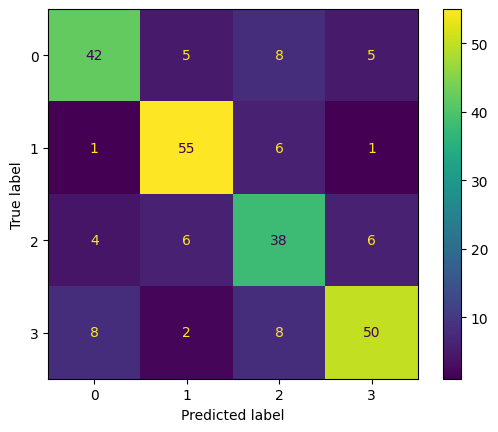

In [89]:
cm_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)
cm_disp_rf_opt = ConfusionMatrixDisplay(cm_rf_opt).plot()

### Random Forest by default has accuracy = 79%<br>Random Forest with the optimizator has accuracy = 78% and give us better prediction for "0", "1" and "3", but worse for "2" class

In [90]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import label_binarize

In [91]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

In [92]:
y_pred_rf_opt_bin = label_binarize(y_pred_rf_opt, classes=np.unique(y_pred_rf_opt))

In [93]:
n_classes = 4

In [94]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _  = roc_curve(y_test_bin[:,i], y_pred_rf_opt_bin[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

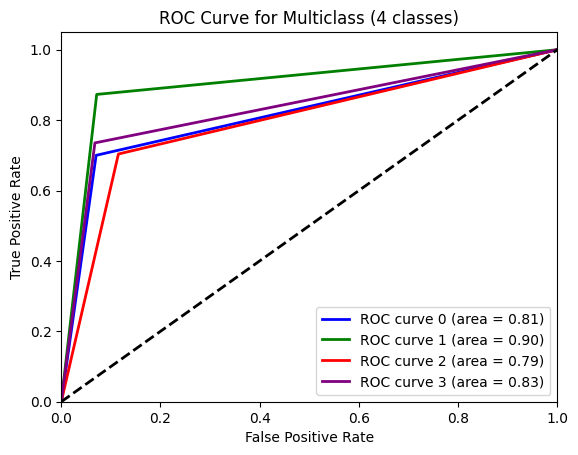

In [95]:
plt.figure()
colors = ['blue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve {i} (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass (4 classes)')
plt.legend(loc="lower right")
plt.show()

# Conclusion: <a id="conclusion"></a>

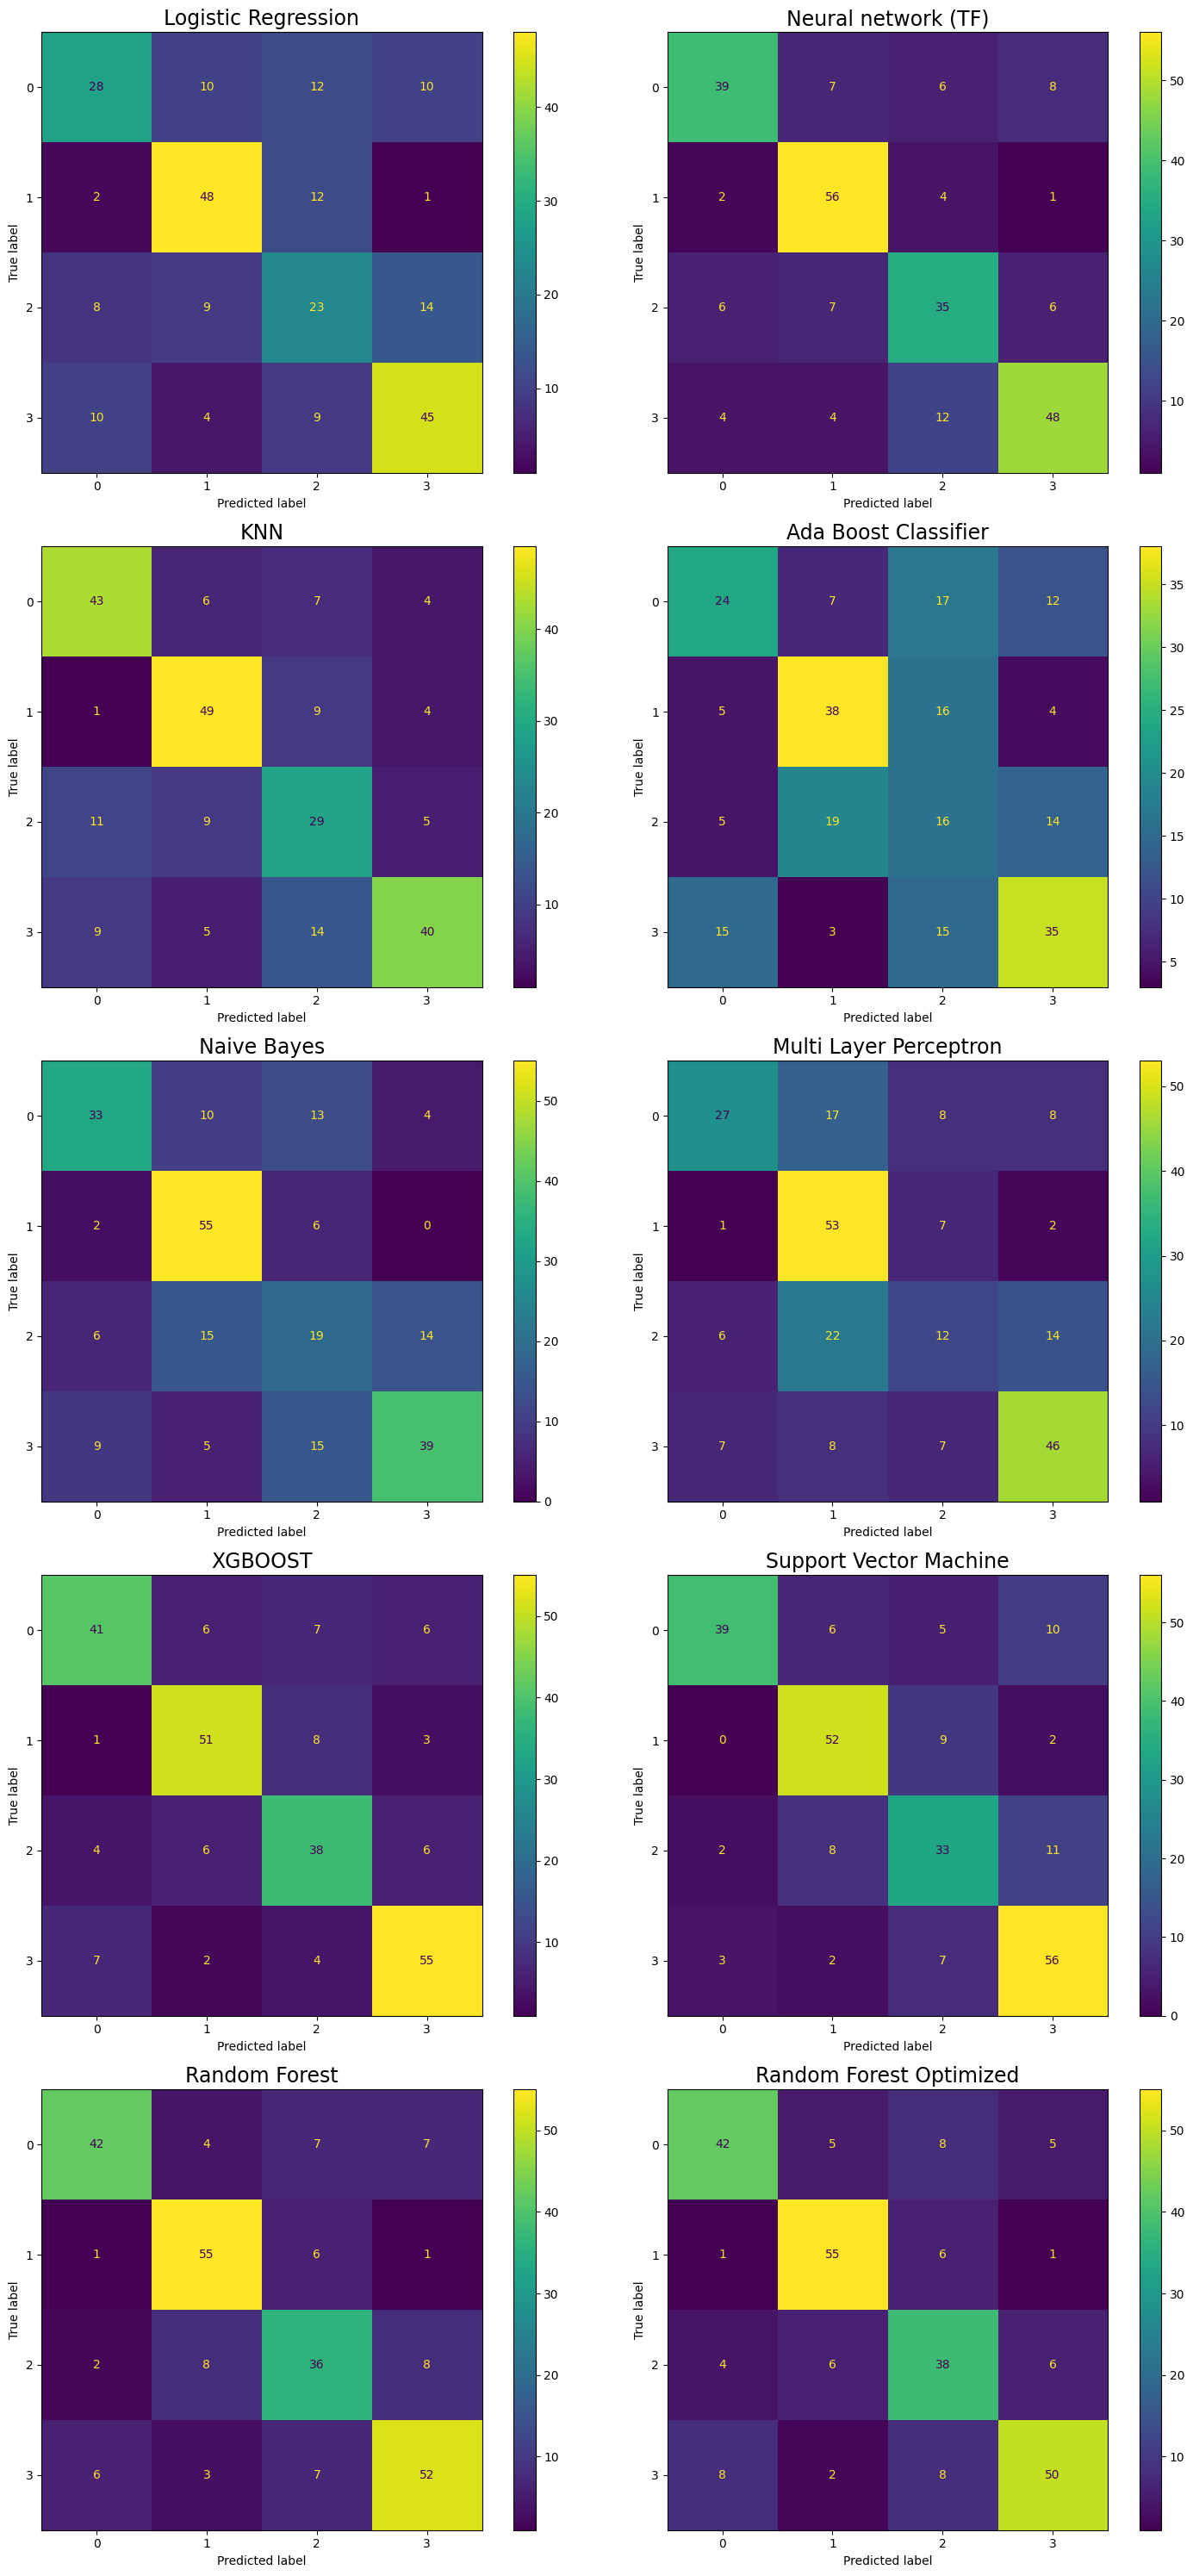

In [96]:
fig, axs = plt.subplots(5,2, figsize = (15,30))
ConfusionMatrixDisplay(cm_lr).plot(ax = axs[0,0])
axs[0,0].set_title('Logistic Regression', fontsize=17)
ConfusionMatrixDisplay(cm_nn).plot(ax = axs[0,1])
axs[0,1].set_title('Neural network (TF)', fontsize=17)
ConfusionMatrixDisplay(cm_knn).plot(ax = axs[1,0])
axs[1,0].set_title('KNN', fontsize=17)
ConfusionMatrixDisplay(cm_abc).plot(ax = axs[1,1])
axs[1,1].set_title('Ada Boost Classifier', fontsize=17)
ConfusionMatrixDisplay(cm_nb).plot(ax = axs[2,0])
axs[2,0].set_title('Naive Bayes', fontsize=17)
ConfusionMatrixDisplay(cm_mlp).plot(ax = axs[2,1])
axs[2,1].set_title('Multi Layer Perceptron', fontsize=17)
ConfusionMatrixDisplay(cm_xgb).plot(ax = axs[3,0])
axs[3,0].set_title('XGBOOST', fontsize=17)
ConfusionMatrixDisplay(cm_svm).plot(ax = axs[3,1])
axs[3,1].set_title('Support Vector Machine', fontsize=17)
ConfusionMatrixDisplay(cm_rf).plot(ax = axs[4,0])
axs[4,0].set_title('Random Forest', fontsize=17)
ConfusionMatrixDisplay(cm_rf_opt).plot(ax = axs[4,1])
axs[4,1].set_title('Random Forest Optimized', fontsize=17)
# axs[4,1].axis('off')
plt.tight_layout()

# Visualization of clusters

In [97]:
from sklearn.cluster import KMeans

In [98]:
k_means = KMeans(n_clusters = 4, random_state = 99)
k_means.fit(X)

KMeans(n_clusters=4, random_state=99)

In [99]:
labels = y

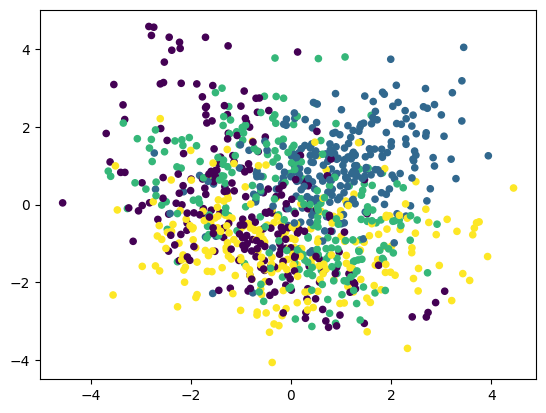

In [100]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = labels, s = 20, cmap = "viridis")